In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=25190d376b85879e968f26dad6e01d541265cd3e7dc27f2d78a9b58b7cc851df
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [3]:
from ISLP import load_data

Auto = load_data('Auto')
mpg_median = Auto['mpg'].median()

# create binary variable 'mpg01' (1 if mpg > median, 0 otherwise)
Auto['mpg01'] = (Auto['mpg'] > mpg_median).astype(int)

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

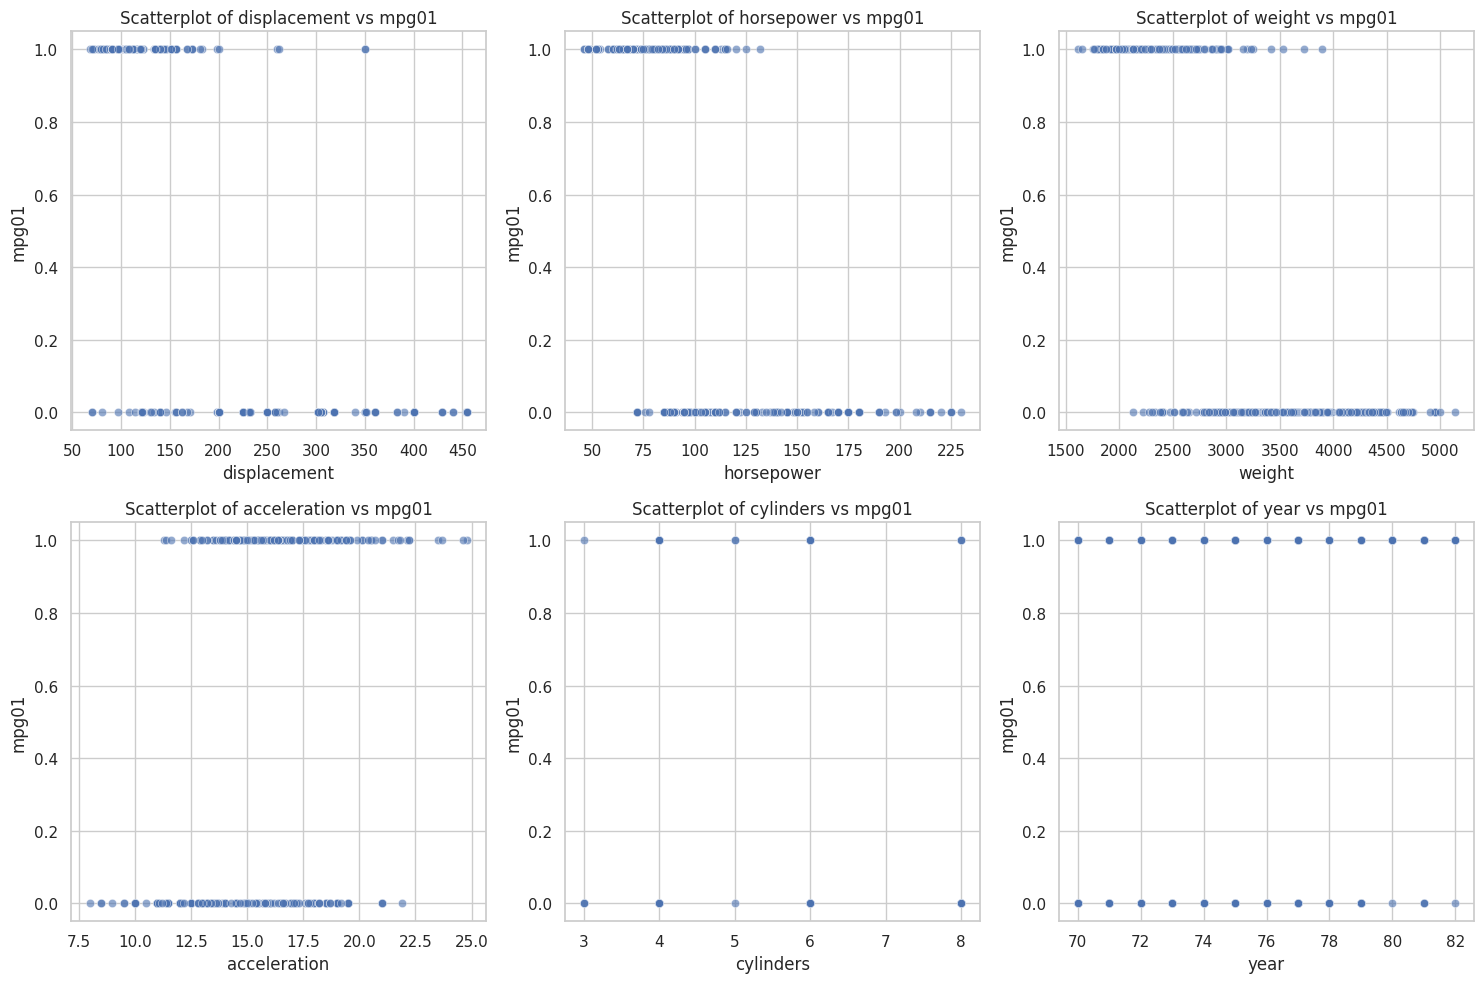

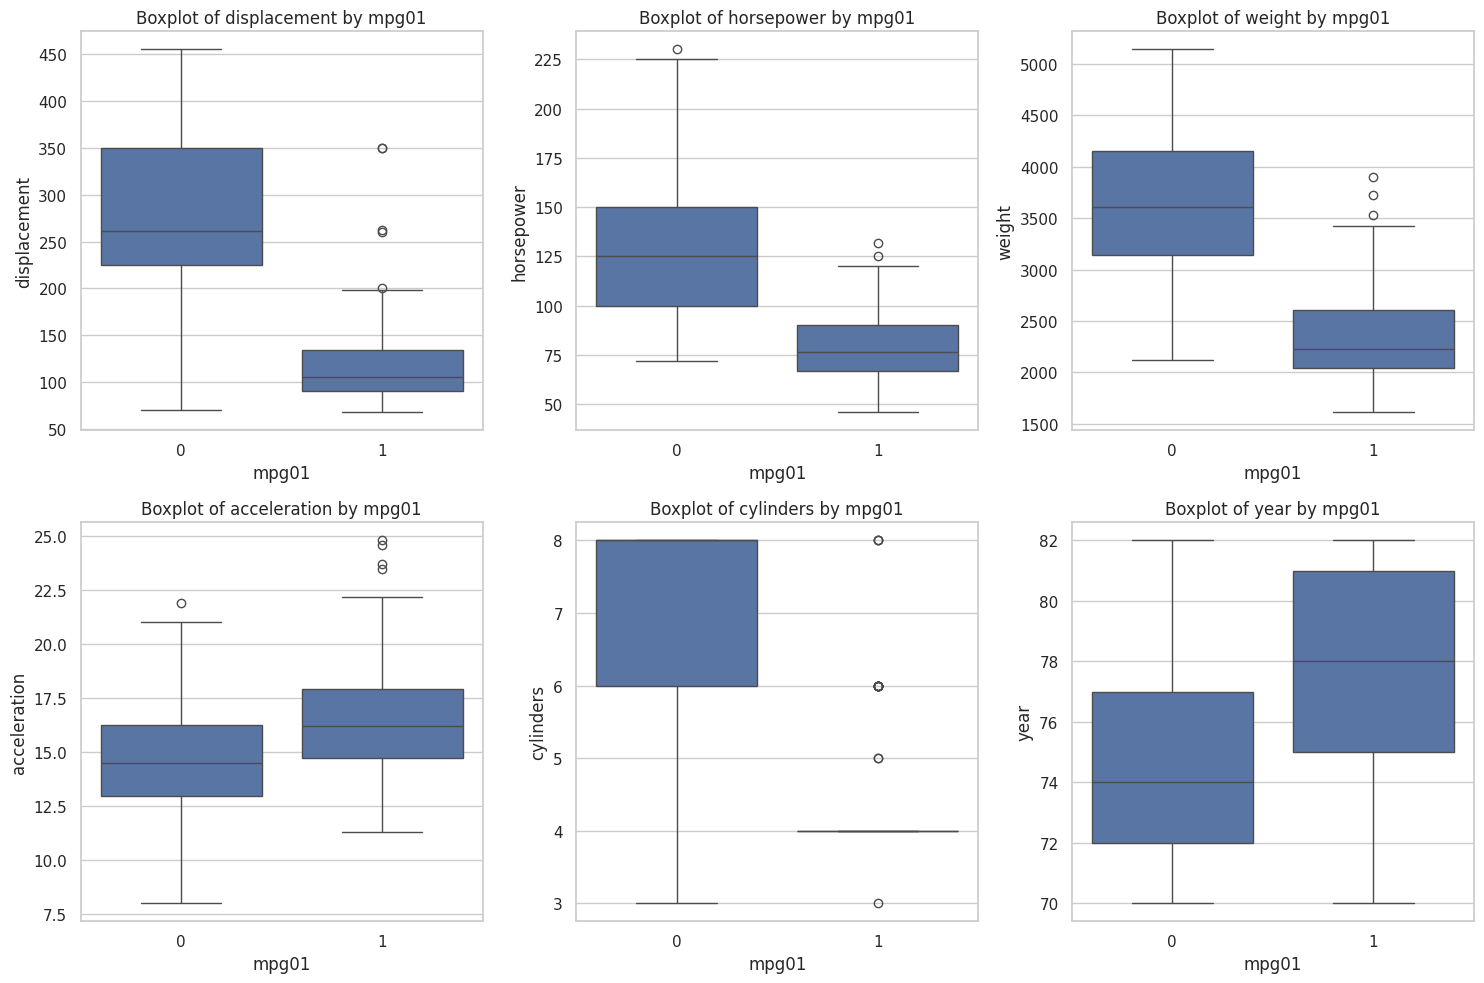

According to the plots, displacement, horsepower, and weight are most likely useful for predicting mpg01.


In [6]:
sns.set(style="whitegrid")

features = ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'year']

# 將每個特徵與 mpg01 比較檢查它們之間的潛在關係
plt.figure(figsize=(15, 10))
for index, feature in enumerate(features, start=1):
    plt.subplot(2, 3, index)
    sns.scatterplot(x=Auto[feature], y=Auto['mpg01'], alpha=0.6)
    plt.title(f'Scatterplot of {feature} vs mpg01')

plt.tight_layout()
plt.show()

# 繪製盒形圖：觀察 mpg01 = 0 和 mpg01 = 1 的各個特徵分布
plt.figure(figsize=(15, 10))
for index, feature in enumerate(features, start=1):
    plt.subplot(2, 3, index)
    sns.boxplot(x=Auto['mpg01'], y=Auto[feature])
    plt.title(f'Boxplot of {feature} by mpg01')

plt.tight_layout()
plt.show()

print('According to the plots, displacement, horsepower, and weight are most likely useful for predicting mpg01.')


(c) Split the data into a training set and a test set.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 指定特徵變數集 (X) 和目標變數 (y)
features = ['displacement', 'horsepower', 'weight']
X = Auto[features]
y = Auto['mpg01']  # 目標變數


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 建立 LDA 模型實例
lda_model = LinearDiscriminantAnalysis()

# 使用訓練數據進行模型訓練
lda_model.fit(X_train, y_train)

# 對測試集進行預測
predictions = lda_model.predict(X_test)

# 計算模型準確率
model_accuracy = accuracy_score(y_test, predictions)

# 計算測試誤差
error_rate = 1 - model_accuracy

print(f'Test Accuracy: {model_accuracy:.2f}')
print(f'Test Error: {error_rate:.2f}')


Test Accuracy: 0.86
Test Error: 0.14


(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 建立 QDA 模型實例
qda_model = QuadraticDiscriminantAnalysis()

# 使用訓練資料進行模型訓練
qda_model.fit(X_train, y_train)

# 在測試集上進行預測
qda_predictions = qda_model.predict(X_test)

# 計算模型的準確率
qda_accuracy = accuracy_score(y_test, qda_predictions)

# 計算測試誤差
qda_error_rate = 1 - qda_accuracy

print(f'Test Accuracy (QDA): {qda_accuracy:.2f}')
print(f'Test Error (QDA): {qda_error_rate:.2f}')


Test Accuracy (QDA): 0.86
Test Error (QDA): 0.14


(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 建立邏輯回歸模型實例，指定使用的解法
logistic_reg = LogisticRegression(solver='liblinear')

# 使用訓練資料來訓練模型
logistic_reg.fit(X_train, y_train)

# 在測試集上進行預測
logistic_predictions = logistic_reg.predict(X_test)

# 計算準確率
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# 計算測試誤差
logistic_error_rate = 1 - logistic_accuracy

print(f'Test Accuracy (Logistic Regression): {logistic_accuracy:.2f}')
print(f'Test Error (Logistic Regression): {logistic_error_rate:.2f}')


Test Accuracy (Logistic Regression): 0.87
Test Error (Logistic Regression): 0.13


(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)


predictions_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, predictions_nb)
error_rate_nb = 1 - accuracy_nb

print(f'Test Accuracy (Naive Bayes): {accuracy_nb:.2f}')
print(f'Test Error (Naive Bayes): {error_rate_nb:.2f}')


Test Accuracy (Naive Bayes): 0.87
Test Error (Naive Bayes): 0.13


(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21)
error_rates = []

for k in k_range:
    # 建立 KNN 模型，設定鄰居數為 k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, predictions_knn)

    error_rate = 1 - accuracy_knn
    error_rates.append(error_rate)

for k, error in zip(k_range, error_rates):
    print(f'Test Error (K={k}): {error:.3f}')


optimal_k = k_range[error_rates.index(min(error_rates))]
min_test_error = min(error_rates)

print(f'Optimal K: {optimal_k}, with Minimum Test Error: {min_test_error:.3f}')


Test Error (K=1): 0.114
Test Error (K=2): 0.114
Test Error (K=3): 0.101
Test Error (K=4): 0.101
Test Error (K=5): 0.152
Test Error (K=6): 0.139
Test Error (K=7): 0.152
Test Error (K=8): 0.165
Test Error (K=9): 0.165
Test Error (K=10): 0.152
Test Error (K=11): 0.165
Test Error (K=12): 0.152
Test Error (K=13): 0.165
Test Error (K=14): 0.177
Test Error (K=15): 0.177
Test Error (K=16): 0.177
Test Error (K=17): 0.190
Test Error (K=18): 0.177
Test Error (K=19): 0.177
Test Error (K=20): 0.165
Optimal K: 3, with Minimum Test Error: 0.101
